### Import all necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def readCsv(file_name):
    
    '''Reading stock data form csv file as Pandas DataFrame'''
    appl_data = ''
    file_path = "data/"+file_name
    if os.path.exists(file_path):
        aapl_data = pd.read_csv(file_path)
    else: print("{0} file does not exists !!".format(file_name))
    return aapl_data

In [3]:
def prepTrData(stockdata):
    '''Getting relevant data from Dataframe for Training'''
    stockdata = stockdata.iloc[::-1]
    stockdata["highLowAvg"] = (stockdata["high"]+stockdata["low"])/2
    stockdata["highLowAvg"] = stockdata.highLowAvg.shift(-1)
    stockdata = stockdata.dropna()
    stocks = list(stockdata.close)
    avg = list(stockdata.highLowAvg)
    return stocks, avg

In [7]:
stockdata = pd.read_csv("nasdaq_apple.csv")
stockdata.head()


,date,close,volume,open,high,low
0,2018/07/13,191.33,12506830.0,191.08,191.8400,190.9000
1,2018/07/12,191.03,18000180.0,189.53,191.4100,189.3100
2,2018/07/11,187.88,18776390.0,188.50,189.7799,187.6100
3,2018/07/10,190.35,15801370.0,190.71,191.2800,190.1801
4,2018/07/09,190.58,19636390.0,189.50,190.6800,189.3000


In [8]:
stock_list, avg_list = prepTrData(stockdata)

C:\Users\nehac\AppData\Local\Temp\ipykernel_20260\588319428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdata["highLowAvg"] = (stockdata["high"]+stockdata["low"])/2
C:\Users\nehac\AppData\Local\Temp\ipykernel_20260\588319428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdata["highLowAvg"] = stockdata.highLowAvg.shift(-1)


### Seperating Test and Training data

In [9]:
test_size = 0.10
avg_list = np.reshape(avg_list, (len(avg_list),1))
X_train, X_test, Y_train, Y_test = train_test_split(avg_list, stock_list,test_size = test_size )

# Training Model

### Linear SVR ::

In [10]:
lin_svr = SVR(kernel = 'linear', C=1e3)
rbf_svr = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
lin_svr.fit(X_train, Y_train)
lin_svr.score(X_test, Y_test)

0.9785181239410802

### Polynomial SVR::

In [11]:
poly_svr = SVR(kernel = 'poly', degree = 2, C=1e3)
poly_svr.fit(X_train, Y_train)
poly_svr.score(X_test, Y_test)

0.9253546239710815

### RBF SVR::

In [12]:
rbf_svr = SVR(kernel= 'rbf', C=1e3, gamma=0.1)
rbf_svr.fit(X_train, Y_train)
rbf_svr.score(X_test, Y_test)

0.9860335329549181

# Plot Graph

Text(0.5, 1.0, 'Stock Prediction SVR')

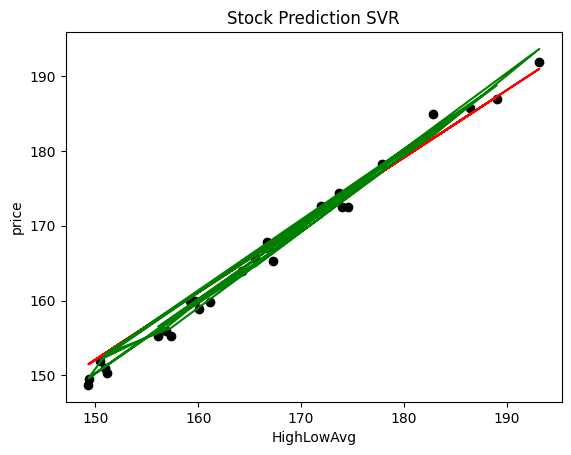

In [13]:
plt.scatter(X_test, Y_test, color= 'black', label = 'Data')
plt.plot(X_test, lin_svr.predict(X_test), color='red', label= 'linear Model')
plt.plot(X_test, rbf_svr.predict(X_test), color='green', label= 'RBF Model')
plt.xlabel("HighLowAvg")
plt.ylabel("price")
plt.title("Stock Prediction SVR")